In [22]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [23]:
# 1. LOAD DATA

# Load the dataset
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (7043, 21)


In [24]:
# 2. INITIAL DATA EXPLORATION

print("\nDATASET OVERVIEW")
print("="*80)
print(df.head())

print("\nCOLUMN INFORMATION")
print("="*80)
print(df.info())

print("\nSTATISTICAL SUMMARY")
print("="*80)
print(df.describe())

print("\nTARGET VARIABLE DISTRIBUTION")
print("="*80)
print(df['Churn'].value_counts())
print("\nChurn Percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)


DATASET OVERVIEW
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies   

In [25]:
# 3. DATA QUALITY CHECKS

print("\nMISSING VALUES")
print("="*80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])

print("\nDUPLICATE ROWS")
print("="*80)
print(f"Number of duplicates: {df.duplicated().sum()}")

print("\nDATA TYPES")
print("="*80)
print(df.dtypes.value_counts())

# Check for spaces in TotalCharges (common issue in this dataset)
print("\nCHECKING TotalCharges COLUMN")
print("="*80)
print(f"Data type: {df['TotalCharges'].dtype}")
if df['TotalCharges'].dtype == 'object':
    print("TotalCharges is object type - needs conversion!")
    print(f"Unique non-numeric values: {df[df['TotalCharges'].str.strip() == '']['TotalCharges'].count()}")



MISSING VALUES
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

DUPLICATE ROWS
Number of duplicates: 0

DATA TYPES
object     18
int64       2
float64     1
Name: count, dtype: int64

CHECKING TotalCharges COLUMN
Data type: object
TotalCharges is object type - needs conversion!
Unique non-numeric values: 11


In [26]:
# 4. VISUALIZATION FUNCTIONS

def plot_categorical_distribution(df, column, hue='Churn'):
    """Plot distribution of categorical variable with churn rate"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    sns.countplot(data=df, x=column, hue=hue, ax=axes[0])
    axes[0].set_title(f'Distribution of {column}')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Churn rate by category
    churn_rate = df.groupby(column)['Churn'].apply(lambda x: (x=='Yes').sum()/len(x)*100)
    churn_rate.plot(kind='bar', ax=axes[1], color='coral')
    axes[1].set_title(f'Churn Rate by {column}')
    axes[1].set_ylabel('Churn Rate (%)')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def plot_numerical_distribution(df, column):
    """Plot distribution of numerical variable"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Distribution
    df[column].hist(bins=50, ax=axes[0], edgecolor='black')
    axes[0].set_title(f'Distribution of {column}')
    axes[0].set_xlabel(column)
    
    # Box plot by Churn
    df.boxplot(column=column, by='Churn', ax=axes[1])
    axes[1].set_title(f'{column} by Churn Status')
    plt.sca(axes[1])
    plt.xticks([1, 2], ['No', 'Yes'])
    
    # Violin plot
    sns.violinplot(data=df, x='Churn', y=column, ax=axes[2])
    axes[2].set_title(f'{column} Distribution by Churn')
    
    plt.tight_layout()
    plt.show()



CREATING VISUALIZATIONS...


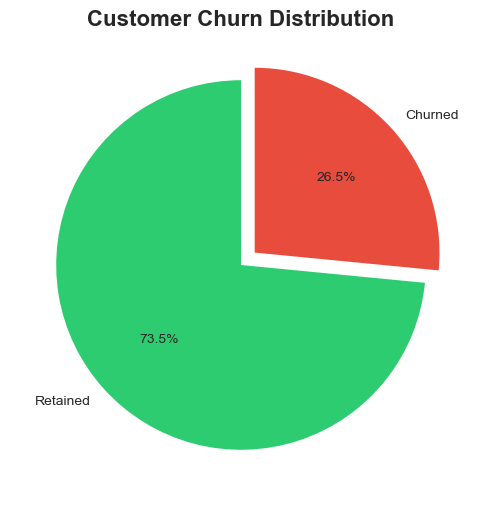


🎨 Plotting categorical features...


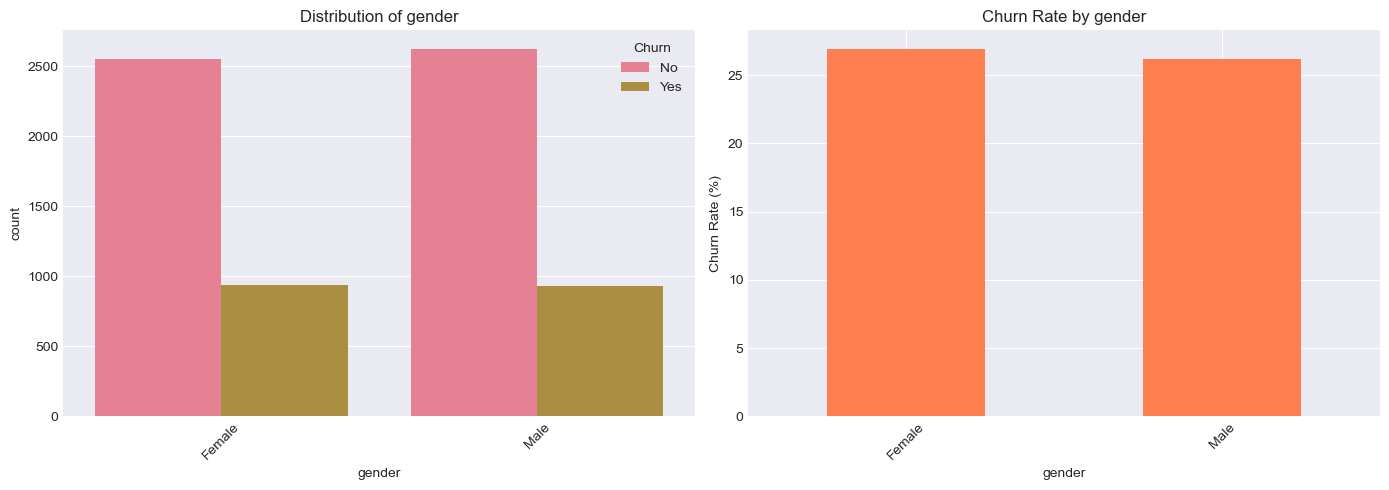

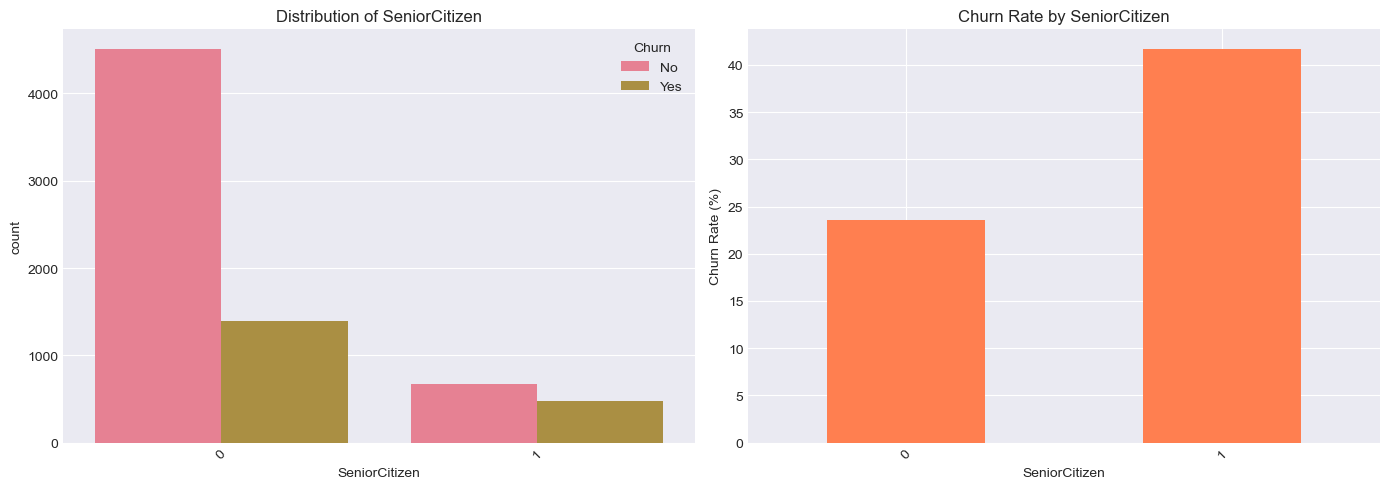

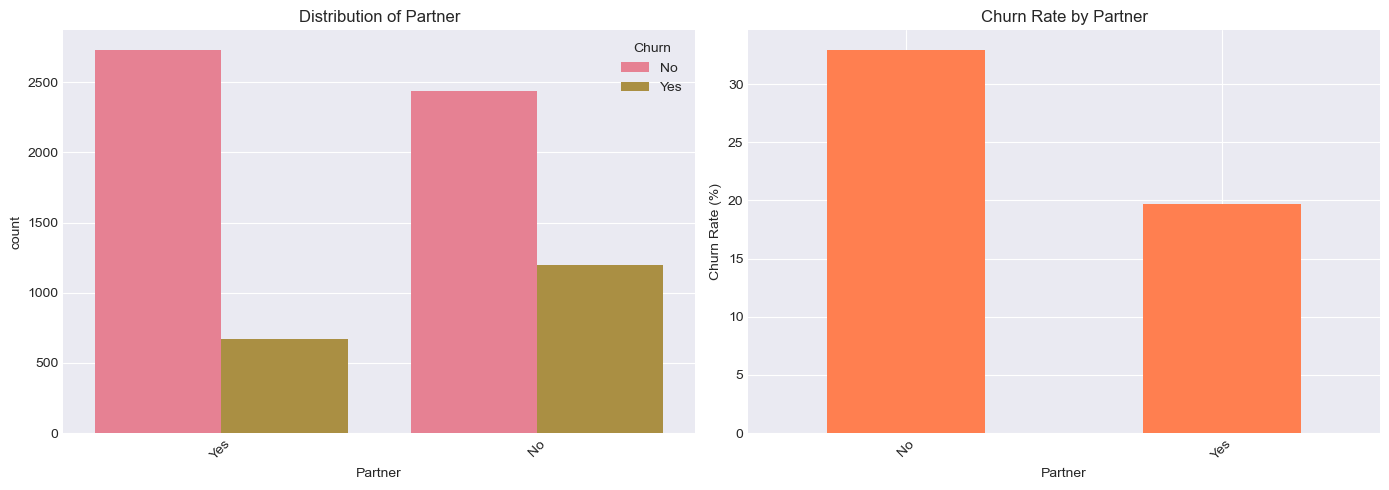

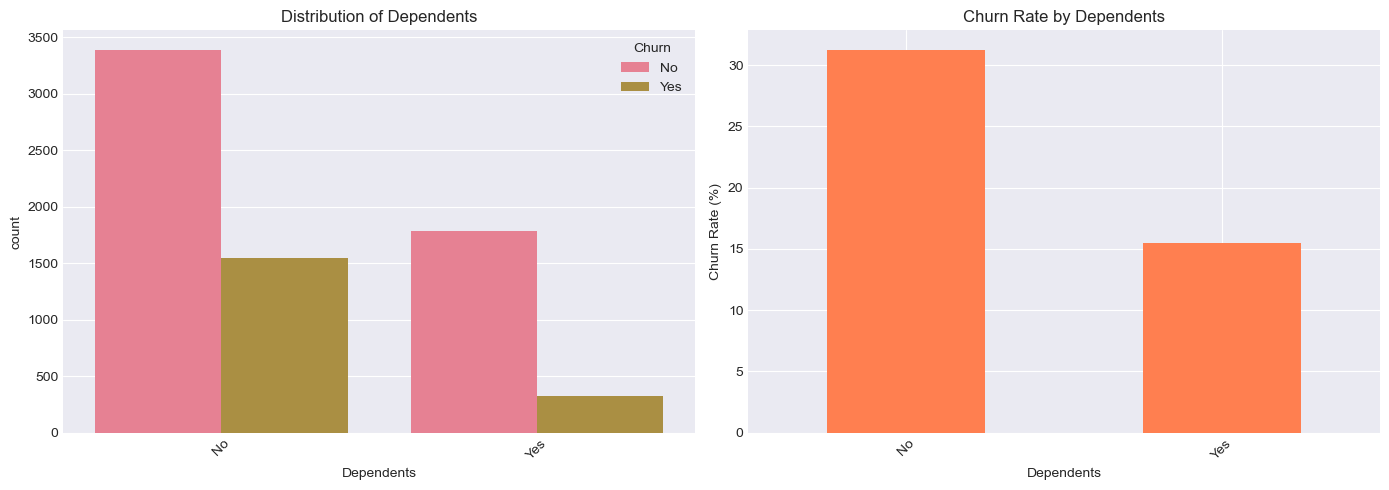

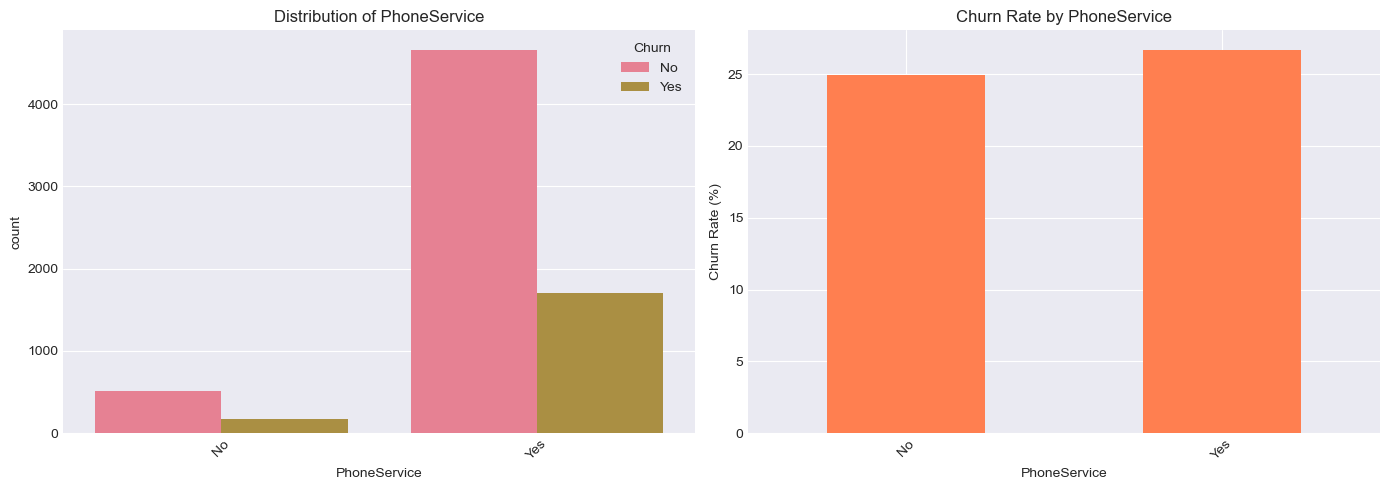


Plotting numerical features...


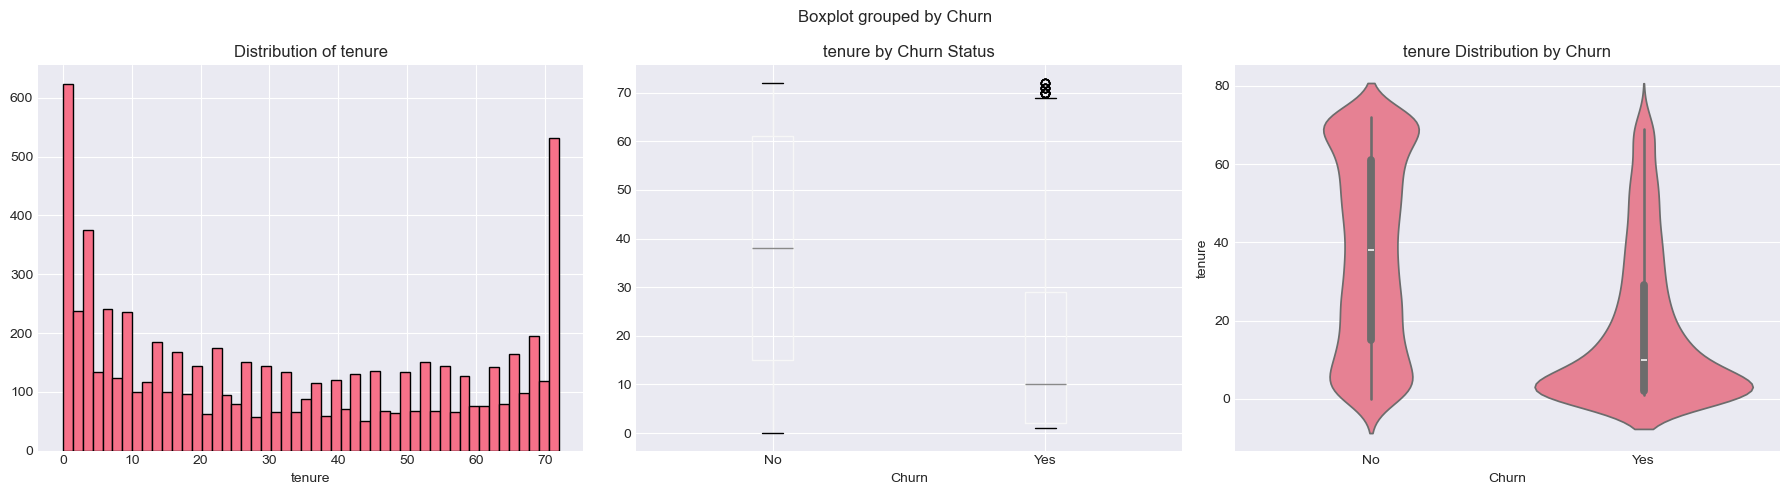

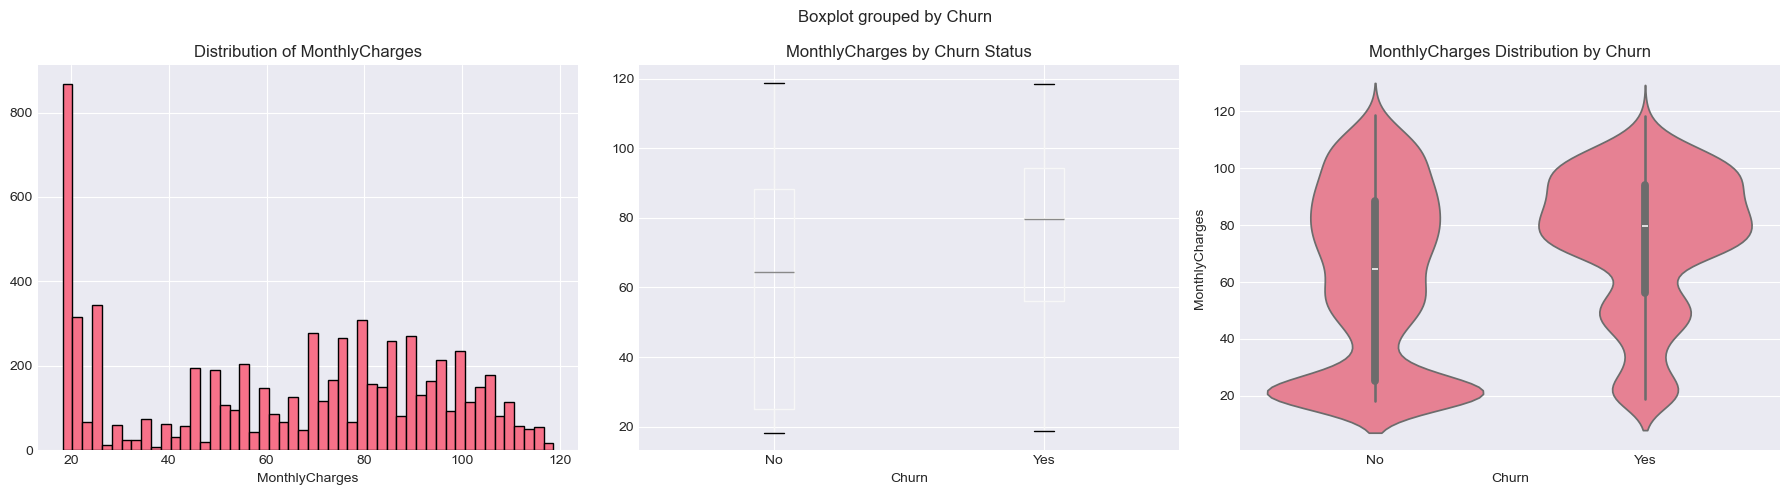

In [27]:
# 5. KEY VISUALIZATIONS

print("\nCREATING VISUALIZATIONS...")
print("="*80)

# Churn Distribution
fig, ax = plt.subplots(figsize=(8, 6))
churn_counts = df['Churn'].value_counts()
colors = ['#2ecc71', '#e74c3c']
plt.pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=(0, 0.1))
plt.title('Customer Churn Distribution', fontsize=16, fontweight='bold')
plt.show()

# Categorical Features Analysis
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

print("\n🎨 Plotting categorical features...")
for feature in categorical_features[:5]:  # Plot first 5 as example
    if feature in df.columns:
        plot_categorical_distribution(df, feature)

# Numerical Features Analysis
print("\nPlotting numerical features...")
numerical_features = ['tenure', 'MonthlyCharges']

for feature in numerical_features:
    if feature in df.columns:
        plot_numerical_distribution(df, feature)


CORRELATION ANALYSIS


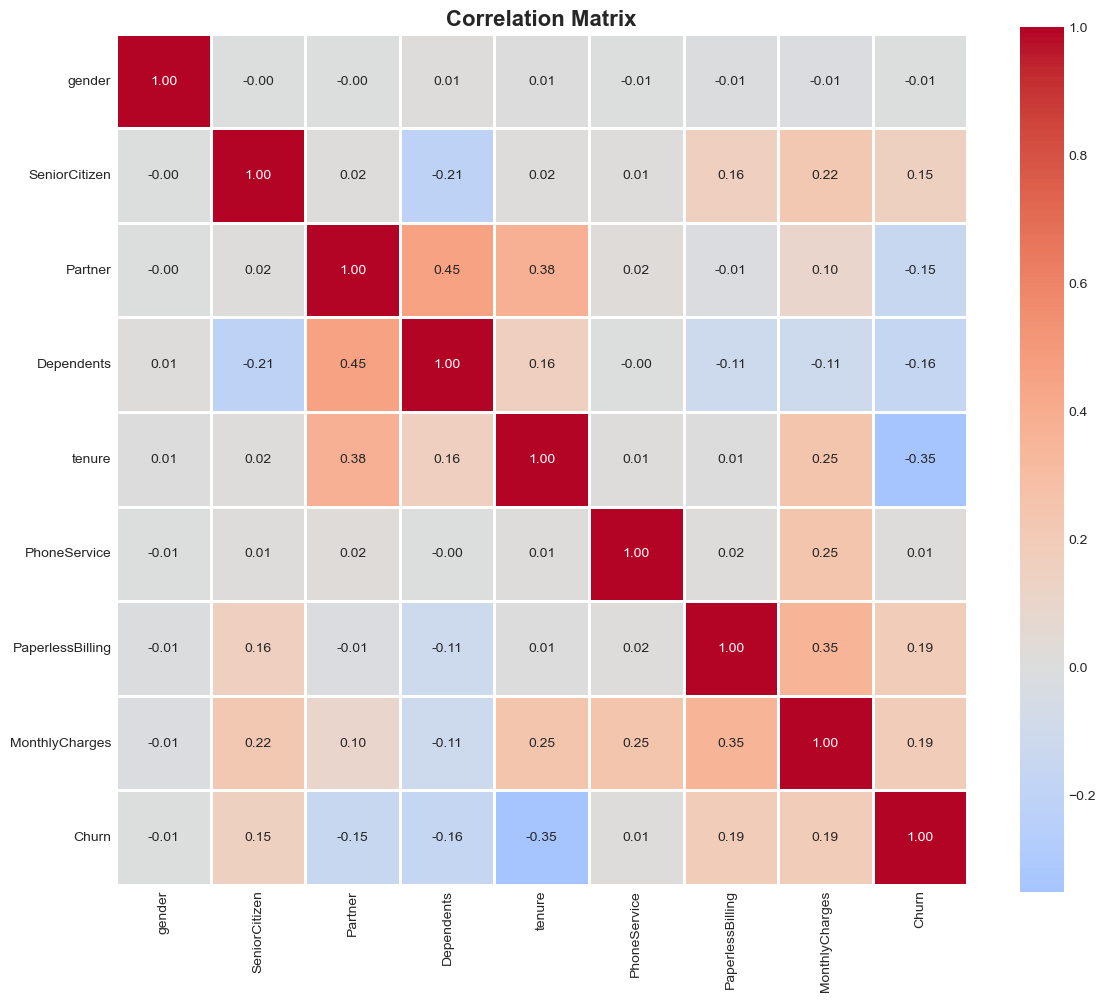


Features Most Correlated with Churn:
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
gender             -0.008612
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
Name: Churn, dtype: float64


In [28]:
# 6. CORRELATION ANALYSIS

print("\nCORRELATION ANALYSIS")
print("="*80)

# Prepare data for correlation (convert categorical to numeric)
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})
df_corr['gender'] = df_corr['gender'].map({'Male': 1, 'Female': 0})
df_corr['Partner'] = df_corr['Partner'].map({'Yes': 1, 'No': 0})
df_corr['Dependents'] = df_corr['Dependents'].map({'Yes': 1, 'No': 0})
df_corr['PhoneService'] = df_corr['PhoneService'].map({'Yes': 1, 'No': 0})
df_corr['PaperlessBilling'] = df_corr['PaperlessBilling'].map({'Yes': 1, 'No': 0})

# Select numerical columns
numerical_cols = df_corr.select_dtypes(include=[np.number]).columns
correlation_matrix = df_corr[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation with Churn
print("\nFeatures Most Correlated with Churn:")
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

In [29]:
# 7. KEY INSIGHTS SUMMARY

print("KEY INSIGHTS FROM EDA")
print("="*80)

# Calculate key metrics
total_customers = len(df)
churned_customers = len(df[df['Churn'] == 'Yes'])
churn_rate = (churned_customers / total_customers) * 100

print(f"\n1. BUSINESS METRICS:")
print(f"   - Total Customers: {total_customers:,}")
print(f"   - Churned Customers: {churned_customers:,}")
print(f"   - Churn Rate: {churn_rate:.2f}%")

print(f"\n2. TENURE ANALYSIS:")
avg_tenure_churned = df[df['Churn']=='Yes']['tenure'].mean()
avg_tenure_retained = df[df['Churn']=='No']['tenure'].mean()
print(f"   - Avg Tenure (Churned): {avg_tenure_churned:.1f} months")
print(f"   - Avg Tenure (Retained): {avg_tenure_retained:.1f} months")

print(f"\n3. REVENUE ANALYSIS:")
avg_monthly_churned = df[df['Churn']=='Yes']['MonthlyCharges'].mean()
avg_monthly_retained = df[df['Churn']=='No']['MonthlyCharges'].mean()
print(f"   - Avg Monthly Charges (Churned): ${avg_monthly_churned:.2f}")
print(f"   - Avg Monthly Charges (Retained): ${avg_monthly_retained:.2f}")

print(f"\n4. CONTRACT ANALYSIS:")
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x=='Yes').sum()/len(x)*100)
print("   Churn Rate by Contract Type:")
for contract, rate in contract_churn.items():
    print(f"   - {contract}: {rate:.2f}%")

print(f"\n5. INTERNET SERVICE ANALYSIS:")
internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x=='Yes').sum()/len(x)*100)
print("   Churn Rate by Internet Service:")
for service, rate in internet_churn.items():
    print(f"   - {service}: {rate:.2f}%")

print("\n" + "="*80)
print("EDA COMPLETE! Ready for Feature Engineering.")

KEY INSIGHTS FROM EDA

1. BUSINESS METRICS:
   - Total Customers: 7,043
   - Churned Customers: 1,869
   - Churn Rate: 26.54%

2. TENURE ANALYSIS:
   - Avg Tenure (Churned): 18.0 months
   - Avg Tenure (Retained): 37.6 months

3. REVENUE ANALYSIS:
   - Avg Monthly Charges (Churned): $74.44
   - Avg Monthly Charges (Retained): $61.27

4. CONTRACT ANALYSIS:
   Churn Rate by Contract Type:
   - Month-to-month: 42.71%
   - One year: 11.27%
   - Two year: 2.83%

5. INTERNET SERVICE ANALYSIS:
   Churn Rate by Internet Service:
   - DSL: 18.96%
   - Fiber optic: 41.89%
   - No: 7.40%

EDA COMPLETE! Ready for Feature Engineering.


In [30]:
# 8. SAVE INSIGHTS FOR NEXT STEPS

# Save key findings
insights = {
    'total_customers': total_customers,
    'churn_rate': churn_rate,
    'avg_tenure_churned': avg_tenure_churned,
    'avg_monthly_churned': avg_monthly_churned,
    'high_risk_segments': {
        'Month-to-month_contract': contract_churn.get('Month-to-month', 0),
        'Fiber_optic_internet': internet_churn.get('Fiber optic', 0)
    }
}

print("\nKey insights saved for modeling phase!")
print(insights)


Key insights saved for modeling phase!
{'total_customers': 7043, 'churn_rate': 26.536987079369588, 'avg_tenure_churned': np.float64(17.979133226324237), 'avg_monthly_churned': np.float64(74.44133226324237), 'high_risk_segments': {'Month-to-month_contract': np.float64(42.70967741935484), 'Fiber_optic_internet': np.float64(41.89276485788114)}}
